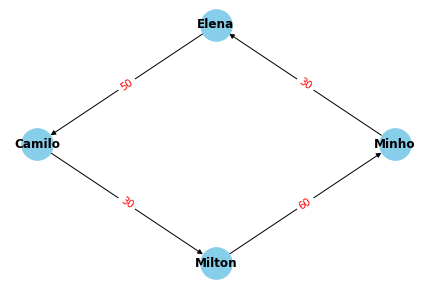

In [2]:
from PIL import Image
from IPython.display import display
img = Image.open('pic/transaction_graph.png')
display(img)

Our assumption for the optimal transaction is [('Minho', 'Milton', 30.0), ('Camilo', 'Elena', 20.0)]. It mean, Minho has to get 30 from Milton, and Camilo has to get 20 from Elena. Let's check this assumption on two main debt settlement algorithms: Python Sort, Merge Sort 

In [8]:
import ipytest
ipytest.autoconfig()
from debt_settlement import calculate_debts_python_sorted, calculate_debts_merge_sort 

class Expense:
    def __init__(self, payer, debtors, amount):
        self.payer = payer
        self.debtors = debtors
        self.amount = amount
expenses_test = [
    Expense('Elena',['Camilo'], 50),
    Expense('Camilo',['Milton'],30),
    Expense('Milton',['Minho'],60),
    Expense('Minho',['Elena'],30)
]

def test_python_sort():
    assert calculate_debts_python_sorted(expenses_test) == [('Minho', 'Milton', 30.0), ('Camilo', 'Elena', 20.0)]
    
def test_merge_sort():
    assert calculate_debts_merge_sort(expenses_test) == [('Minho', 'Milton', 30.0), ('Camilo', 'Elena', 20.0)]
    
ipytest.run('-vv')
ipytest.clean()

======================================= test session starts =======================================
platform win32 -- Python 3.8.8, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- C:\Users\LG\anaconda3\python.exe
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('C:\\Users\\LG\\Desktop\\Hertie\\2024_S\\DataStructuresAlgorithms\\Project\\DSA-Debt-Settlement-Group-6\\testing\\.hypothesis\\examples')
rootdir: C:\Users\LG\Desktop\Hertie\2024_S\DataStructuresAlgorithms\Project\DSA-Debt-Settlement-Group-6\testing
plugins: anyio-3.6.1, hypothesis-6.24.0, cov-3.0.0
collecting ... collected 2 items

t_f0c7d44068c54aedb19a563c6fea4808.py::test_python_sort PASSED                               [ 50%]
t_f0c7d44068c54aedb19a563c6fea4808.py::test_merge_sort PASSED                                [100%]

======================================== 2 passed in 0.06s ========================================


Even though it spits the warning, but two algorithms work correctly!! Then, the last part is to check whether it raise the correct *ValueError* message when the debt amount is negative (because there is no negative currency in the world).

In [35]:
ipytest.clean()
ipytest.autoconfig()
import pytest

expenses_test_negative = [
    Expense('Elena',['Camilo'], -50),
    Expense('Camilo',['Milton'],30),
    Expense('Milton',['Minho'],60),
    Expense('Minho',['Elena'],30)
]

# Here, we are going to test that even though we input the negative expense, whether algorithms works or not. 
# If both algorithms work correctly, then they should raise error message

def test_python_sort_negative():
    # Test with negative expense
    result = calculate_debts_python_sorted(expenses_test_negative) 
    assert len(result) > 0 
    # If the the function returns any meaningful result, which is problematic, then it will be passed, otherwise failed


def test_merge_sort_negative():
    # Test with negative expenses
    result = calculate_debts_merge_sort(expenses_test_negative)
    assert len(result) > 0
    # If the the function returns any meaningful result, which is problematic, then it will be passed, otherwise failed
    
ipytest.run('-vv')

======================================= test session starts =======================================
platform win32 -- Python 3.8.8, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- C:\Users\LG\anaconda3\python.exe
cachedir: .pytest_cache
hypothesis profile 'default' -> database=DirectoryBasedExampleDatabase('C:\\Users\\LG\\Desktop\\Hertie\\2024_S\\DataStructuresAlgorithms\\Project\\DSA-Debt-Settlement-Group-6\\testing\\.hypothesis\\examples')
rootdir: C:\Users\LG\Desktop\Hertie\2024_S\DataStructuresAlgorithms\Project\DSA-Debt-Settlement-Group-6\testing
plugins: anyio-3.6.1, hypothesis-6.24.0, cov-3.0.0
collecting ... collected 2 items

t_f0c7d44068c54aedb19a563c6fea4808.py::test_python_sort_negative FAILED                      [ 50%]
t_f0c7d44068c54aedb19a563c6fea4808.py::test_merge_sort_negative FAILED                       [100%]

============================================ FAILURES =============================================
____________________________________ test_python_sort_negative

<ExitCode.TESTS_FAILED: 1>

You can see that two tests are failed, which is what we want. Both algorithms properly raise the ValueError message "Expense has to be positive"